In [6]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\owner\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [7]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Read the CSV and Perform Basic Data Cleaning

In [9]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [10]:
# Set features. This will also be used as your x values.
selected_features = df[["koi_disposition","koi_impact","koi_time0bk","koi_period","koi_slogg","koi_depth","koi_prad","koi_insol","koi_model_snr","koi_tce_plnt_num","koi_steff"]]

In [11]:

conf_cand = selected_features[(selected_features['koi_disposition']=='CONFIRMED') | (selected_features['koi_disposition']=='CANDIDATE')]
conf_cand.reset_index(drop=True, inplace=True)

In [12]:
conf_cand

,koi_disposition,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
0,CONFIRMED,0.586,162.513840,54.418383,4.467,874.8,2.83,9.11,25.8,2,5455
1,CONFIRMED,0.701,171.595550,2.525592,4.438,603.3,2.75,926.16,40.9,1,6031
2,CONFIRMED,0.762,172.979370,4.134435,4.486,686.0,2.77,427.65,40.2,2,6046
3,CONFIRMED,0.755,179.554370,2.566589,4.486,226.5,1.59,807.74,15.0,3,6046
4,CONFIRMED,0.052,173.621937,16.068647,4.485,4914.3,5.76,30.75,161.9,1,5031
...,...,...,...,...,...,...,...,...,...,...,...
3482,CANDIDATE,0.218,131.787600,4.736816,4.456,35.3,0.60,395.05,6.9,1,6088
3483,CANDIDATE,0.075,218.271900,130.235324,4.529,750.1,2.44,2.86,9.7,1,5616
3484,CANDIDATE,1.206,137.481093,8.870416,4.027,873.1,39.46,414.26,43.8,1,6022
3485,CANDIDATE,1.230,144.131720,47.109631,3.597,752.2,78.98,75.40,35.1,1,5258


In [13]:
SF_balanced = selected_features.append(conf_cand)

In [14]:
SF_balanced

,koi_disposition,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
0,CONFIRMED,0.586,162.513840,54.418383,4.467,874.8,2.83,9.11,25.8,2,5455
1,FALSE POSITIVE,0.969,175.850252,19.899140,4.544,10829.0,14.60,39.30,76.3,1,5853
2,FALSE POSITIVE,1.276,170.307565,1.736952,4.564,8079.2,33.46,891.96,505.6,1,5805
3,CONFIRMED,0.701,171.595550,2.525592,4.438,603.3,2.75,926.16,40.9,1,6031
4,CONFIRMED,0.762,172.979370,4.134435,4.486,686.0,2.77,427.65,40.2,2,6046
...,...,...,...,...,...,...,...,...,...,...,...
3482,CANDIDATE,0.218,131.787600,4.736816,4.456,35.3,0.60,395.05,6.9,1,6088
3483,CANDIDATE,0.075,218.271900,130.235324,4.529,750.1,2.44,2.86,9.7,1,5616
3484,CANDIDATE,1.206,137.481093,8.870416,4.027,873.1,39.46,414.26,43.8,1,6022
3485,CANDIDATE,1.230,144.131720,47.109631,3.597,752.2,78.98,75.40,35.1,1,5258


# Create a Train Test Split

Use `koi_disposition` for the y values

In [15]:
X = SF_balanced.drop('koi_disposition',axis=1)
y = SF_balanced['koi_disposition']

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42)


In [17]:
X_train.head()

,koi_impact,koi_time0bk,koi_period,koi_slogg,koi_depth,koi_prad,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff
5577,0.399,134.052302,6.882686,4.483,373660.0,60.49,169.85,2842.2,1,5704
2907,0.365,132.260680,4.563837,4.496,201.8,1.22,218.18,9.9,1,5408
258,0.164,146.152850,16.568068,4.602,1331.4,2.54,21.27,41.9,1,4987
3881,0.020,157.754400,43.849647,2.644,452.3,21.42,645.68,8.3,1,4893
3397,0.174,143.159880,11.912567,3.893,123.1,2.61,562.27,27.8,1,6337


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [52]:
# import MinMaxScaler to scale data
from sklearn.preprocessing import MinMaxScaler
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
classifier.fit(X_train,y_train)


C:\Users\Owner\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.35059811656910156
Testing Data Score: 0.3767175572519084


In [25]:
predictions = classifier.predict(X_test)

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['FALSE POSITIVE' 'CONFIRMED' 'CONFIRMED' 'CONFIRMED' 'CONFIRMED'
 'FALSE POSITIVE' 'CONFIRMED' 'CANDIDATE' 'CANDIDATE' 'FALSE POSITIVE']
First 10 Actual labels: ['FALSE POSITIVE', 'CANDIDATE', 'CANDIDATE', 'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE', 'CANDIDATE']


In [26]:
model1 = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


Decision Tree


In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train_scaled, y_train)
print('Train score: {}'.format(clf.score(X_train_scaled, y_train)))
print('Test score: {}'.format(clf.score(X_test_scaled, y_test)))

Train score: 0.7705523033850853
Test score: 0.7194656488549618


K Nearest Neighbors

k: 5, Train/Test Score: 0.740/0.621
k: 7, Train/Test Score: 0.709/0.595
k: 9, Train/Test Score: 0.688/0.602
k: 11, Train/Test Score: 0.670/0.603
k: 13, Train/Test Score: 0.659/0.590
k: 15, Train/Test Score: 0.648/0.588
k: 17, Train/Test Score: 0.649/0.583
k: 19, Train/Test Score: 0.648/0.584


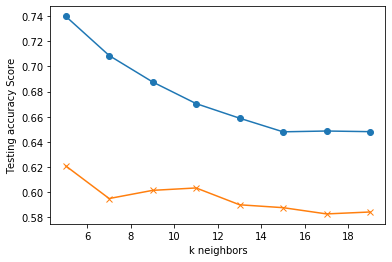

In [35]:
from sklearn.neighbors import KNeighborsClassifier 

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show() 

In [36]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.602


Random Forest


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=45)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8603053435114504

In [43]:
sorted(zip(rf.feature_importances_, X), reverse=True)


[(0.1985516936420337, 'koi_model_snr'),
 (0.14090916776030724, 'koi_prad'),
 (0.11633200384638094, 'koi_depth'),
 (0.1155551392973951, 'koi_period'),
 (0.11229380148501873, 'koi_impact'),
 (0.08574116502677703, 'koi_time0bk'),
 (0.07384022909869944, 'koi_insol'),
 (0.06923108669084609, 'koi_slogg'),
 (0.06874327075301784, 'koi_steff'),
 (0.018802442399524017, 'koi_tce_plnt_num')]

In [44]:
# Best Model Score
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.9994909646220412
Testing Data Score: 0.8603053435114504


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [59]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100,200,300,400,500],
             'min_samples_leaf':[1,2,3,4]}


In [60]:
# Train the model with GridSearch
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3)


In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=1, n_estimators=100, score=0.842, total=   1.9s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.859, total=   1.9s
[CV] min_samples_leaf=1, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


[CV]  min_samples_leaf=1, n_estimators=100, score=0.842, total=   1.9s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.828, total=   1.8s
[CV] min_samples_leaf=1, n_estimators=100 ............................
[CV]  min_samples_leaf=1, n_estimators=100, score=0.852, total=   2.2s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.836, total=   4.2s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.856, total=   3.9s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.845, total=   3.9s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  min_samples_leaf=1, n_estimators=200, score=0.829, total=   3.8s
[CV] min_samples_leaf=1, n_estimators=200 ............................
[CV]  

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)